Brytningsindexet för vattten är 1.359  0.016


<ipython-input-3-e892c5854242>:80: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(x,y,xerr=dx, yerr=dy, label='data', color='black', ms=3, capsize=3, fmt='o', marker='D')


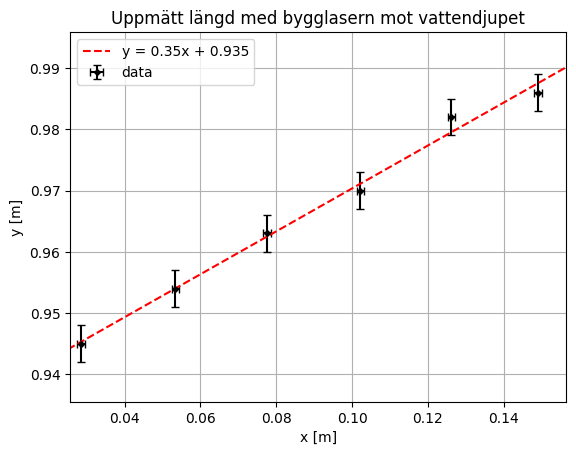

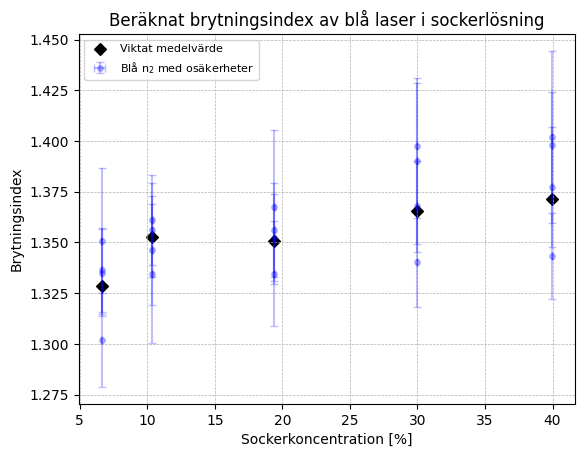

korrelation för blå laser med sockerkoncentration: 0.8983588990381494


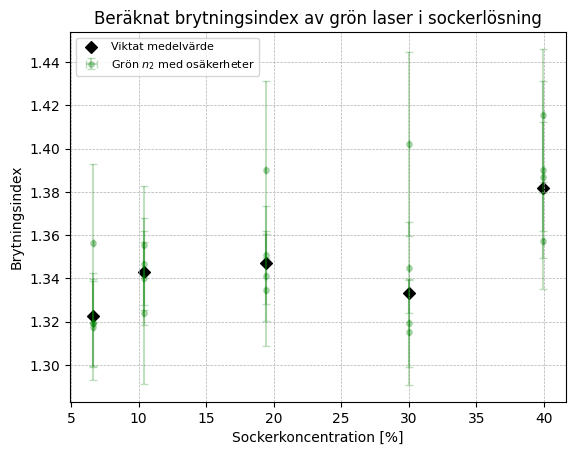

korrelation för grön laser med sockerkoncentration: 0.7534352714019309


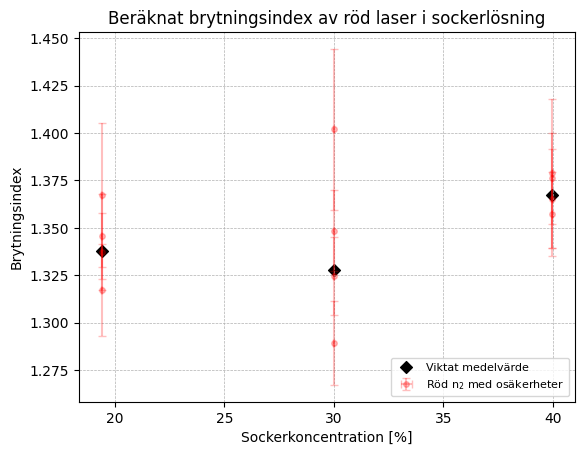

korrelation för grön laser med sockerkoncentration: 0.7058974347476062


<ipython-input-3-e892c5854242>:430: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(bluep[0]*100, weightedmean(bluepf2, bluexe), yerr=wsem1b, xerr=0, color='black', label='Viktat medelvärde',alpha=1, ms=3, capsize=3, fmt='o', marker='D')


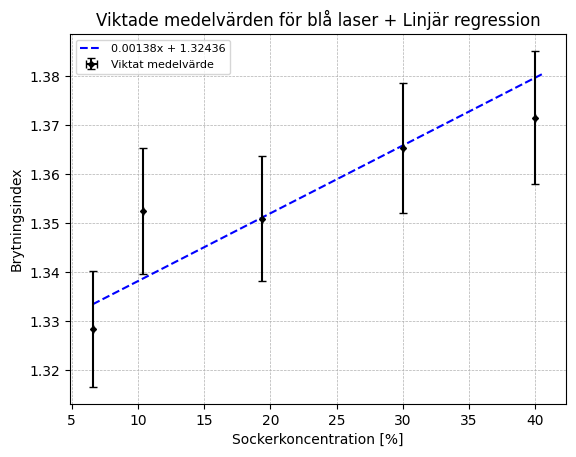

Osäkerheten i lutningen för blå är 0.00032 och osäkerheten i skärningspunkten med y-axeln 0.00748


<ipython-input-3-e892c5854242>:453: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(greenp[0]*100, weightedmean(greenpf2, greenxe), yerr=wsem1g, xerr=0, color='black', label='Viktat medelvärde',alpha=1, ms=3, capsize=3, fmt='o', marker='D')


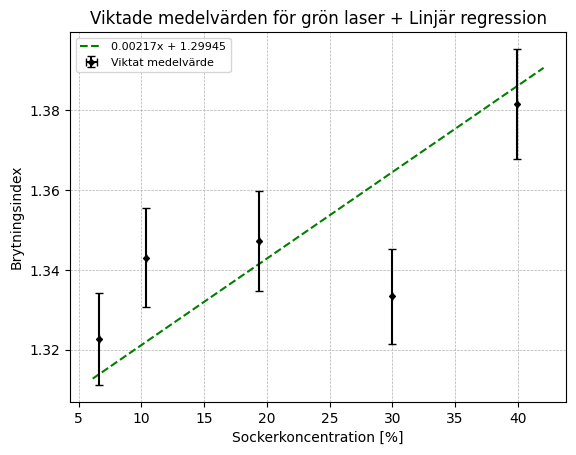

Osäkerheten i lutningen för grön är 0.00063 och osäkerheten i skärningspunkten med y-axeln 0.01475


<ipython-input-3-e892c5854242>:476: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  plt.errorbar(redp[0]*100, weightedmean(redpf2, redxe), yerr=wsem1r, xerr=0, color='black', label='Viktat medelvärde',alpha=1, ms=3, capsize=3, fmt='o', marker='D')


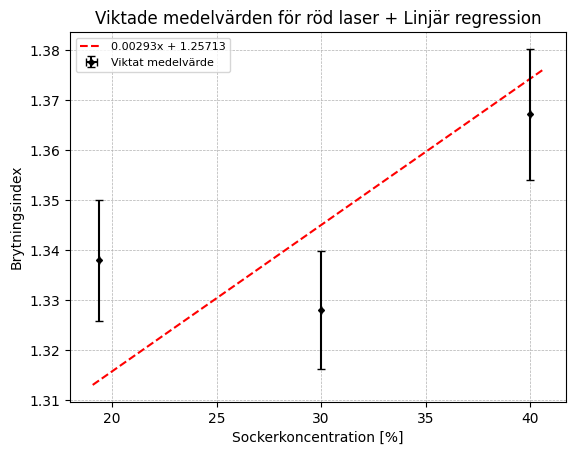

Osäkerheten i lutningen för röd är 0.00146 och osäkerheten i skärningspunkten med y-axeln 0.0444


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stat

"""
Brytningsindex med hjälp av laseravståndsmätare
"""

#vätskedjupet i meter
x = np.array([2.85,5.34,7.75,10.22,12.62,14.9])*10**(-2)
dx = 0.001

#avstånd mätt med lasern
y = np.array([0.945,0.954,0.963,0.970,0.982,0.986])
dy = 0.003

#plt.errorbar(x, y, xerr=dx, yerr=dy, fmt='r ')
#plt.plot(x,y,'r.')

slope, intercept, r, p, se = stat.linregress(x, y)
q = np.linspace(0.8*min(x),1.2*max(x),100)
#plt.plot(q,slope*q+intercept, label = f'y = {round(slope,3)}x + {round(intercept,3)}')

#plt.xlim(0.9*min(x),1.05*max(x))
#plt.xlabel('x/m')
#plt.ylabel('y/m')
#plt.ylim(0.98*min(y),1.02*max(y))
#plt.legend(loc=4)
#plt.show()

#################
# Beräkningar
#################

H = 0.865+0.0428
dH = 0.003

Δy = 0.935
dΔy = 0.003

θ1 = np.arccos(H/Δy)*180/np.pi #infallsvinkel i grader
dθ1 = (dH/H+dΔy/Δy)/np.tan(θ1)*180/np.pi #osäkerheten i infallsvinkeln

# För beräkningar i Python används radianer
θ1 = np.arccos(H/Δy) #infallsvinkel i radianer

#praktisk parameter för senare beräkningar
p = slope + 1/np.cos(θ1)

#regression
reg = np.polyfit(x,y,deg=1,cov=True)
alpha = reg[0][0]
konst = reg[0][1]
s_alpha = np.sqrt(reg[1][0,0])
s_konst = np.sqrt(reg[1][1,1])

dp = s_alpha+np.pi*np.sin(θ1)/(180*(np.cos(θ1))**2)*dθ1

tal = p**2*np.sqrt(1-4*(np.sin(θ1))**2/p**2)+p**2-2*(np.sin(θ1))**2
nam = np.sqrt(1-4*(np.sin(θ1))**2/p**2)*np.sqrt(1+np.sqrt(1-4*(np.sin(θ1))**2/p**2))
dn2dp = 1/(np.sqrt(2)*p**2)*tal/nam

tal = -np.sqrt(2*p)*np.pi*np.sin(θ1)*np.cos(θ1)
nam = 180*np.sqrt(p+np.sqrt(p**2-4*(np.sin(θ1))**2))*np.sqrt(p**2-4*(np.sin(θ1))**2)
dn2dt = tal/nam

#brytningsindex för vatten
D1 = 1-(2*np.sin(θ1)/p)**2
D2m = 1-np.sqrt(D1)
D2p = 1+np.sqrt(D1)
nw = 1/np.sqrt(2)*p*np.sqrt(D2p) #lösning nw<1 är ofysikalisk

dnw = np.sqrt(dn2dp**2*dp**2+dn2dt**2*dθ1**2)

print(f'Brytningsindexet för vattten är {np.around(nw,3)}  {np.around(dnw,3)}')

x_fit = np.arange(0.02,0.2,0.01)
y_fit = konst+alpha*x_fit

plt.errorbar(x,y,xerr=dx, yerr=dy, label='data', color='black', ms=3, capsize=3, fmt='o', marker='D')
plt.xlabel('x [m]')
plt.xlim(0.9*min(x),1.05*max(x))
plt.ylabel('y [m]')
plt.ylim(0.99*min(y),1.01*max(y))

plt.plot(x_fit,y_fit,'red', label= f'y = {np.around(alpha,3)}x + {np.around(konst,3)}', linestyle='--')
plt.legend()
plt.grid()
plt.title('Uppmätt längd med bygglasern mot vattendjupet')
#plt.fill_between(x_fit,y_fit+s_alpha, y_fit-s_alpha, alpha=0.5,color='grey')
#SER UT ATT VARA UNDERLIGT STORA OSÄKERHETER I LINJEN?

plt.show()



"""
Ny data
"""
import numpy as np
import matplotlib.pyplot as plt

def dglas(n1,ng,lg,t): #paralellförskjutning av glaset
    numerator = lg*n1/(np.sqrt(2))*np.sin(np.deg2rad(t*2))*np.sqrt(n1**4*np.cos(np.deg2rad(t*2))-n1**2+2*ng**2)-2*lg*n1**2*(np.sin(np.deg2rad(t)))**3+2*lg*ng**2*np.sin(np.deg2rad(t))
    denominator= 2*(ng**2-n1**2*(np.sin(np.deg2rad(t)))**2)
    return numerator / denominator

def pf2(n1,ng,t,l,lg,d): #paralellförskjutningsformel med hänsyn till glasets påverkan
    d1 = dglas(n1,ng,lg,t)

    numerator = np.sin(np.deg2rad(t))*n1
    denominator = (-1 * ((d-2*d1) - (l-2*lg) * np.sin(np.deg2rad(t)))) / (np.sqrt((d-2*d1)**2 - 2 * (d-2*d1) * (l-2*lg) * np.sin(np.deg2rad(t)) + (l-2*lg)**2))
    return numerator / denominator

def dfdt(t, d, l, n1,lg):
    d1 = dglas(n1,ng,lg,t)
    d=d-2*d1
    l=l-2*lg

    numerator = d*n1*np.cos(np.deg2rad(t))*(d**2-3*d*l*np.sin(np.deg2rad(t))+l**2*(np.sin(np.deg2rad(t)))**2+l**2)
    denominator = (d-l*np.sin(np.deg2rad(t)))**2*np.sqrt(d**2-2*d*l*np.sin(np.deg2rad(t))+l**2)
    return numerator / denominator

def dfdl(t, d, l, n1,lg):
    d1 = dglas(n1,ng,lg,t)
    d=d-2*d1
    l=l-2*lg

    numerator = d*l*n1*np.sin(np.deg2rad(t))*((np.sin(np.deg2rad(t)))**2-1)
    denominator = (d-l*np.sin(np.deg2rad(t)))**2*np.sqrt(d**2-2*d*l*np.sin(np.deg2rad(t))+l**2)
    return numerator / denominator

def dfdd(t, d, l, n1,lg):
    d1 = dglas(n1,ng,lg,t)
    d=d-2*d1
    l=l-2*lg

    numerator = l**2*n1*np.sin(np.deg2rad(t))*((np.sin(np.deg2rad(t)))**2-1)
    denominator = (d-l*np.sin(np.deg2rad(t)))**2*np.sqrt(d**2-2*d*l*np.sin(np.deg2rad(t))+l**2)
    return numerator / denominator


def df(t, d, l, n1, dt, dd, dl):
    df_dt = dfdt(t, d, l, n1,lg)
    df_dd = dfdd(t, d, l, n1,lg)
    df_dl = dfdl(t, d, l, n1,lg)
    dn2 = np.sqrt((df_dt * np.radians(dt))**2 + (df_dd * dd)**2 + (df_dl * dl)**2)

    return dn2


n1 = np.zeros((3,4,5))+1.0003
ng = np.zeros((3,4,5))+1.1323 #experimentellt bestämt brytningsindex
dn1 = np.zeros((3,4,5)) #färg, vinkel, koncentration
vinklarbla=np.array([
        [15, 15, 15, 15, 15], #, 15, 15
        [31, 30, 30, 30, 30], #, 30, 30
        [45, 42.5, 42.5, 45, 45], #, 45, 45
        [60, 60, 60, 60, 60]]) #, 60, 60
vinklargron=np.array([
        [15, 15, 15, 15, 15], #, 15, 15
        [31, 30, 30, 30, 30], #, 30, 30
        [45, 42.5, 42.5, 45, 45], #, 45, 45
        [57, 60, 60, 60, 60]]) #, 60, 60
vinklarrod=np.array([
        [15, 15, 15, 15, 15], #, 15, 15
        [31, 30, 30, 30, 30], #, 30, 30
        [45, 42.5, 42.5, 45, 45], #, 45, 45
        [56, 60, 60, 60, 60]]) #, 60, 60
t = np.array([vinklarbla, vinklargron, vinklarrod])
dt = np.zeros((3,4,5))+1 #vinkel
d = 10**(-2) * np.array([
    [
        [2.5, 2.45, 2.35, 2.2, 2.275], #, 2.25, 2.15
        [5.65, 4.9, 5.05, 5.05, 4.85], #, 4.55, 4.6
        [8.65, 8.25, 8.05, 8.9, 8.55], #, 7.5, 7.8
        [14.75, 15.05, 14.05, 14.25, 13.45] #, 0., 13.65 nollan beror på att Nelly inte mätte lika många vinklar för vatten
    ],
    [
        [2.45, 2.5, 2.45, 2.15, 2.3], #, 2.2, 2.05
        [5.55, 4.7, 5, 4.9, 4.7], #, 4.45, 4.5
        [8.85, 7.95, 7.9, 8.7, 8.3], #, 7.35, 7.8
        [14, 13.7, 14.05, 14.4, 13.75] #, 0, 12.1
    ],
    [
        [2.4, 2.5, 2.35, 0,0], #,0,0
        [5.45, 4.75, 4.95, 0,0], #,0,0
        [8.85, 8, 7.85, 0,0], #,0,0
        [12.85, 13.2, 13.74, 0,0] #,0,0
    ]
])

dd = np.zeros((3,4,5))+0.0005
l = np.zeros((3,4,5))+0.317
dl = np.zeros((3,4,5))+0.0005

rod = np.zeros((4,5))+635
gron = np.zeros((4,5))+532
bla = np.zeros((4,5))+450
L = np.array([bla, gron, rod])

lg=np.zeros((3,4,5))+0.0006 #glasets bredd

V0=1.2041+1.3002
V=[V0, V0+0.8331,V0+0.8331+1.822, V0+0.8331+1.822+4.49994, V0+0.8331+1.822+4.49994+1.827]
ms = [0.50098+0.50002 for _ in V]
dmv = [0.001 for _ in V]
dms = [0.001, 0.002, 0.004, 0.005, 0.0008]
koncentrationer = np.array([[0.39971249,0.29993408,0.19401481,0.10363027,0.0664494],[0.39971249,0.29993408,0.19401481,0.10363027,0.0664494],[0.39971249,0.29993408,0.19401481,0.10363027,0.0664494],[0.39971249,0.29993408,0.19401481,0.10363027,0.0664494]])
p=np.array([koncentrationer, koncentrationer, koncentrationer])

def density(ms, V):
    return np.array(ms) / np.array(V)
densities = density(ms, V)

def ddensity(dmv,dms,ms,V):
    return np.sqrt((1/np.array(V)*np.array(dmv))**2+(np.array(ms)/np.array(V)**2*np.array(dms))**2)


"""
medel_p=[]
osakerhet=[]

for c in [0,1,2,3,4]: #,5,6
    #första test
    f = 0 #färg
    c = c #koncentration

    xt = t[f,:,c]
    xd = d[f,:,c]
    xl = l[f,:,c]
    xn1 = n1[f,:,c]
    xdt = dt[f,:,c]
    xdl = dl[f,:,c]
    xdd = dd[f,:,c]
    xL = L[f,:,c]
    xlg = lg[f,:,c]
    xng = ng[f,:,c]

    parallell = pf2(xn1,xng,xt,xl,xlg,xd)
    parallell = parallell[~np.isnan(parallell)]
    medel_p.append(np.mean(parallell))
    def dff(xt, xd, xl, xn1, xdt, xdl, xdd):
        return np.sqrt((dfdt(xt, xd, xl, xn1)*np.radians(xdt))**2 + (dfdl(xt, xd, xl, xn1)*xdl)**2 + (dfdd(xt, xd, xl, xn1)*xdd)**2)
    osakerhet.append(1/len(dff(xt,xd,xl,xn1,xdt,xdl,xdd))*sum(dff(xt,xd,xl,xn1,xdt,xdl,xdd)**2))


print(medel_p)
print(osakerhet)
"""



### PLOTTER AV BRYTNINGSINDEX OCH KONCENTRATIONEN ###

indexerror=df(t, d, l, n1, dt, dd, dl)
densityerror = ddensity(dmv, dms, ms,V)[::-1]
perror = np.tile(densityerror, (3, 4, 1))


pf2_values = pf2(n1, ng, t, l, lg, d)
#blå
bluepf2 = pf2_values[0]
bluep = p[0]
bluexe = indexerror[0]
blueye = perror[0]

#grön
greenpf2 = pf2_values[1]
greenp = p[1]
greenxe = indexerror[1]
greenye = perror[1]

#röd
redpf2 = pf2_values[2]
redp = p[2]
redxe = indexerror[2]
redye = perror[2]



bluemask = (~np.isnan(bluepf2)) & (~np.isnan(bluep)) & (bluepf2 >= 1.05) & (bluexe >= 0.01)
greenmask = (~np.isnan(greenpf2)) & (~np.isnan(greenp)) & (greenpf2 >= 1.05) & (greenxe >= 0.01)
redmask = (~np.isnan(redpf2)) & (~np.isnan(redp)) & (redpf2 >= 1.05) & (redxe >= 0.01)




def weightedmean(values, uncertainties):
    mask = (~np.isnan(values)) & (values > 1.05) & (~np.isnan(uncertainties)) & (uncertainties >= 0.01)

    mean_values = np.full(values.shape[1], np.nan)

    for col in range(values.shape[1]):
        col_mask = mask[:, col]
        filteredvalues = values[col_mask, col]
        filtereduncertainties = uncertainties[col_mask, col]

        if len(filteredvalues) > 0:
            weights = 1 / (filtereduncertainties ** 2)
            weighted_sum = np.sum(filteredvalues * weights)
            weight_sum = np.sum(weights)
            mean_values[col] = weighted_sum / weight_sum

    return mean_values


def Regression(xvalues,yvalues):
    yvalues = yvalues*100
    delta = len(xvalues)*np.sum(xvalues**2)-(np.sum(xvalues))**2

    A = (np.sum(xvalues**2)*np.sum(yvalues)-np.sum(xvalues)*np.sum(xvalues*yvalues)) / delta

    B = (len(xvalues)*np.sum(xvalues*yvalues)-np.sum(xvalues)*np.sum(yvalues)) / delta
    return A, B

weighb = weightedmean(bluepf2, bluexe)
weighg = weightedmean(greenpf2, greenxe)
weighr = weightedmean(redpf2, redxe)
weighr = weighr[:-2]
redp1 = redp[0]
redp2 = redp1[:-2]
xb = np.linspace(min(weighb)+0.005,max(weighb)+0.009,len(weighb))

#Plot för blå laser
plt.scatter(bluep[0]*100, weightedmean(bluepf2, bluexe), color='black', label='Viktat medelvärde',alpha=1, marker='D')
plt.errorbar(bluep[bluemask]*100, bluepf2[bluemask], yerr=bluexe[bluemask], xerr=blueye[bluemask]*100, fmt="o", capsize=3, markersize=4, color='blue', alpha=0.25, label='Blå n$_2$ med osäkerheter')

plt.ylabel("Brytningsindex")
plt.xlabel("Sockerkoncentration [%]")
plt.title("Beräknat brytningsindex av blå laser i sockerlösning")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=8)
plt.savefig("Blålaserplot.png", dpi=300, bbox_inches="tight")
plt.show()

weighted_blue_x = weightedmean(bluepf2, bluexe)
weighted_blue_y = np.mean(bluep, axis=0)
valid_mask = ~np.isnan(weighted_blue_x) & ~np.isnan(weighted_blue_y)
filtered_x = weighted_blue_x[valid_mask]
filtered_y = weighted_blue_y[valid_mask]
correlation_matrix = np.corrcoef(filtered_x, filtered_y)
correlationb = correlation_matrix[0, 1]
print(f'korrelation för blå laser med sockerkoncentration: {correlationb}')



xg = np.linspace(min(weighg)-0.01,max(weighg)+0.009,len(weighg))

# Plot för grön laser
plt.scatter(greenp[0]*100, weightedmean(greenpf2, greenxe), color='black', label='Viktat medelvärde', alpha=1, marker='D')
plt.errorbar(greenp[greenmask]*100, greenpf2[greenmask], yerr=greenxe[greenmask], xerr=greenye[greenmask]*100, fmt="o", capsize=3, markersize=4, color='green', alpha=0.25, label='Grön $n_2$ med osäkerheter')

plt.ylabel("Brytningsindex")
plt.xlabel("Sockerkoncentration [%]")
plt.title("Beräknat brytningsindex av grön laser i sockerlösning")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=8)
plt.savefig("Grönlaserplot.png", dpi=300, bbox_inches="tight")
plt.show()

weighted_green_x = weightedmean(greenpf2, greenxe)
weighted_green_y = np.mean(greenp, axis=0)
valid_mask = ~np.isnan(weighted_green_x) & ~np.isnan(weighted_green_y)
filtered_x = weighted_green_x[valid_mask]
filtered_y = weighted_green_y[valid_mask]
correlation_matrix = np.corrcoef(filtered_x, filtered_y)
correlationg = correlation_matrix[0, 1]
print(f'korrelation för grön laser med sockerkoncentration: {correlationg}')



xr = np.linspace(min(weighr)-0.015,max(weighr)+0.009,len(weighr))

# Plot för röd laser
plt.scatter(redp[0]*100, weightedmean(redpf2, redxe), color='black', label='Viktat medelvärde', alpha=1, marker='D')
plt.errorbar(redp[redmask]*100, redpf2[redmask], yerr=redxe[redmask], xerr=redye[redmask]*100, fmt="o", capsize=3, markersize=4, color='red', alpha=0.25,label='Röd n$_2$ med osäkerheter')

plt.ylabel("Brytningsindex")
plt.xlabel("Sockerkoncentration [%]")
plt.title("Beräknat brytningsindex av röd laser i sockerlösning")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=8)
plt.savefig("Rödlaserplot.png", dpi=300, bbox_inches="tight")
plt.show()

weighted_red_x = weightedmean(redpf2, redxe)
weighted_red_y = np.mean(redp, axis=0)
valid_mask = ~np.isnan(weighted_red_x) & ~np.isnan(weighted_red_y)
filtered_x = weighted_red_x[valid_mask]
filtered_y = weighted_red_y[valid_mask]
correlation_matrix = np.corrcoef(filtered_x, filtered_y)
correlationr = correlation_matrix[0, 1]
print(f'korrelation för grön laser med sockerkoncentration: {correlationr}')




# ====== WSEM ======= #
wsem1b = [] #WSEM BLÅ LASER
for n in range(len(bluexe[0])):
    s = 1 / (bluexe[:,n]**2)
    a = 1 / np.sqrt(np.sum(1 / (bluexe[:,n]**2)))
    wsem1b.append(a)

wsem1g = [] #WESEM GRÖN LASER
for n in range(len(greenxe[0])):
    s = 1 / (greenxe[:,n]**2)
    a = 1 / np.sqrt(np.sum(1 / (greenxe[:,n]**2)))
    wsem1g.append(a)

wsem1r = [] #WSEM RÖD LASER
for n in range(len(redxe[0])):
    s = 1 / (redxe[:,n]**2)
    a = 1 / np.sqrt(np.sum(1 / (redxe[:,n]**2)))
    wsem1r.append(a)



# ======= PLOT MED REGRESSION, VIKTADE MEDELVÄRDEN OCH RESPEKTIVE OSÄKERHETER ========= #
x=weighb
y=100*bluep[0]
w=[1/i for i in wsem1b]
reg = np.polyfit(x,y,deg=1,cov=True,w=w)
B = reg[0][0]
A = reg[0][1]
s_B = np.sqrt(reg[1][0,0])
s_A = np.sqrt(reg[1][1,1])
plt.plot(A + B * xb, xb, color='blue', label=f"{np.round(1 / B, 5)}x + {np.round(-A / B, 5)}", linestyle='--')
plt.errorbar(bluep[0]*100, weightedmean(bluepf2, bluexe), yerr=wsem1b, xerr=0, color='black', label='Viktat medelvärde',alpha=1, ms=3, capsize=3, fmt='o', marker='D')
plt.ylabel("Brytningsindex")
plt.xlabel("Sockerkoncentration [%]")
plt.title("Viktade medelvärden för blå laser + Linjär regression")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=8)
plt.savefig("Blålaserregression.png", dpi=300, bbox_inches="tight")
plt.show()
reg = np.polyfit(y,x,deg=1,cov=True,w=w)
s_lutning = np.sqrt(reg[1][0,0])
s_skärning = np.sqrt(reg[1][1,1])
print(f'Osäkerheten i lutningen för blå är {np.round(s_lutning,5)} och osäkerheten i skärningspunkten med y-axeln {np.round(s_skärning,5)}')


x=weighg
y=100*greenp[0]
w=[1/i for i in wsem1g]
reg = np.polyfit(x,y,deg=1,cov=True,w=w)
B = reg[0][0]
A = reg[0][1]
s_B = np.sqrt(reg[1][0,0])
s_A = np.sqrt(reg[1][1,1])
plt.plot(A + B * xg, xg, color='green', label=f"{np.round(1 / B, 5)}x + {np.round(-A / B, 5)}", linestyle='--')
plt.errorbar(greenp[0]*100, weightedmean(greenpf2, greenxe), yerr=wsem1g, xerr=0, color='black', label='Viktat medelvärde',alpha=1, ms=3, capsize=3, fmt='o', marker='D')
plt.ylabel("Brytningsindex")
plt.xlabel("Sockerkoncentration [%]")
plt.title("Viktade medelvärden för grön laser + Linjär regression")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=8)
plt.savefig("Grönlaserregression.png", dpi=300, bbox_inches="tight")
plt.show()
reg = np.polyfit(y,x,deg=1,cov=True,w=w)
s_lutning = np.sqrt(reg[1][0,0])
s_skärning = np.sqrt(reg[1][1,1])
print(f'Osäkerheten i lutningen för grön är {np.round(s_lutning,5)} och osäkerheten i skärningspunkten med y-axeln {np.round(s_skärning,5)}')


x=weighr
y=100*redp[0][:-2]
w=[1/i for i in wsem1r[:-2]]
reg = np.polyfit(x,y,deg=1,cov=True,w=w)
B = reg[0][0]
A = reg[0][1]
s_B = np.sqrt(reg[1][0,0])
s_A = np.sqrt(reg[1][1,1])
plt.plot(A + B * xr, xr, color='red', label=f"{np.round(1 / B, 5)}x + {np.round(-A / B, 5)}", linestyle='--')
plt.errorbar(redp[0]*100, weightedmean(redpf2, redxe), yerr=wsem1r, xerr=0, color='black', label='Viktat medelvärde',alpha=1, ms=3, capsize=3, fmt='o', marker='D')
plt.ylabel("Brytningsindex")
plt.xlabel("Sockerkoncentration [%]")
plt.title("Viktade medelvärden för röd laser + Linjär regression")
plt.grid(True, linestyle='--', linewidth=0.5)
plt.legend(fontsize=8)
plt.savefig("Rödlaserregression.png", dpi=300, bbox_inches="tight")
plt.show()
reg = np.polyfit(y,x,deg=1,cov=True,w=w)
s_lutning = np.sqrt(reg[1][0,0])
s_skärning = np.sqrt(reg[1][1,1])
print(f'Osäkerheten i lutningen för röd är {np.round(s_lutning,5)} och osäkerheten i skärningspunkten med y-axeln {np.round(s_skärning,5)}')